In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# Define dataset path
dataset_path = "multicategory_image_dataset/images"

# Image Parameters
img_size = (150, 150)
batch_size = 32

# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values (0-1)
    rotation_range=20,  # Rotate images
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% Train, 20% Validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Get the class labels
class_labels = list(train_generator.class_indices.keys())
print(f"Classes: {class_labels}")


Found 800 images belonging to 20 classes.
Found 200 images belonging to 20 classes.
Classes: ['airplanes', 'bicycles', 'birds', 'boats', 'bridges', 'butterflies', 'car', 'castles', 'cat', 'clouds', 'deserts', 'dog', 'elephants', 'fireworks', 'flowers', 'forests', 'fruits', 'lakes', 'mountains', 'trains']


In [3]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(len(class_labels), activation="softmax")  # Output layer
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


C:\Users\91834\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           2,580 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,932 (18.43 MB)

 Trainable params: 4,830,932 (18.43 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
epochs = 10  # You can increase for better accuracy
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

Epoch 1/10


C:\Users\91834\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 400ms/step - accuracy: 0.0502 - loss: 3.1494 - val_accuracy: 0.0850 - val_loss: 2.9692
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 389ms/step - accuracy: 0.0652 - loss: 2.9621 - val_accuracy: 0.1300 - val_loss: 2.8227
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 354ms/step - accuracy: 0.1113 - loss: 2.9012 - val_accuracy: 0.1650 - val_loss: 2.7490
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 395ms/step - accuracy: 0.1293 - loss: 2.8212 - val_accuracy: 0.2150 - val_loss: 2.6223
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 407ms/step - accuracy: 0.1432 - loss: 2.7606 - val_accuracy: 0.2600 - val_loss: 2.5333
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 422ms/step - accuracy: 0.1715 - loss: 2.7094 - val_accuracy: 0.2550 - val_loss: 2.4400
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 408ms/step - accuracy: 0.2034 - loss: 2.5595 - val_accuracy: 0.3100 - val_loss: 2.3351
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 384ms/step - accuracy: 0.2944 - loss: 2.3906 - val_accuracy: 0.320

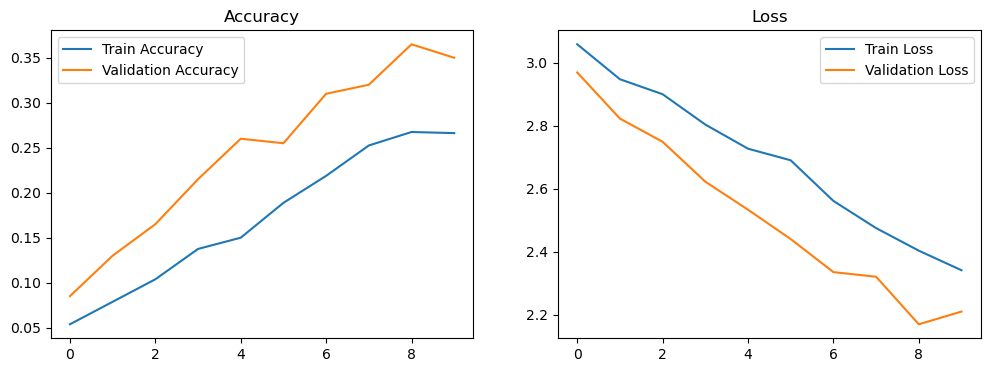

In [5]:
# Plot Accuracy & Loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()

In [6]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Expand batch dimension

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction)

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f})")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


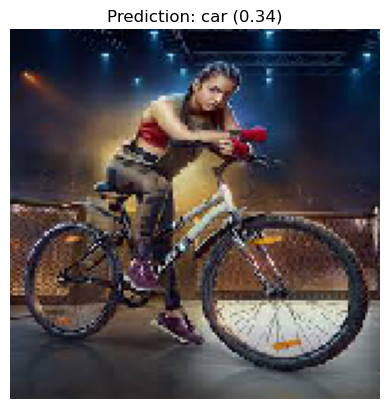

In [7]:
# Example: Test an image
predict_image("multicategory_image_dataset/images/bicycles/img_45.jpg")